<a href="https://colab.research.google.com/github/guidodroblas/guidodroblas/blob/main/Prototipo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción:

Este estudio examina un conjunto de datos que contiene información sobre los precios de los teléfonos móviles. El conjunto de datos incluye diversas características como el nombre, marca, modelo, capacidad de la batería en mAh, tamaño de la pantalla en pulgadas, capacidades táctiles, resolución de pantalla, procesador, RAM, almacenamiento interno, especificaciones de la cámara trasera, especificaciones de la cámara frontal, sistema operativo, conectividad Wi-Fi, capacidades de Bluetooth, funcionalidad de GPS, número de tarjetas SIM admitidas, compatibilidad 3G y 4G/LTE, y precio.

El objetivo de esta investigación es analizar las relaciones y los patrones dentro del conjunto de datos para obtener información sobre los factores que pueden influir en los precios de los teléfonos móviles. Al explorar las correlaciones entre las diferentes variables, podemos identificar los determinantes clave que impactan en la fijación de precios de los teléfonos inteligentes.



Algunas preguntas e hipótesis potenciales que se pueden investigar incluyen:

1. ¿La marca de un teléfono móvil afecta su precio? Hipótesis: Las marcas premium tienden a tener precios más altos en comparación con las marcas menos conocidas o de bajo presupuesto.


2. ¿Existe una correlación entre el tamaño de la pantalla y la capacidad de la batería? Hipótesis: Los tamaños de pantalla más grandes se asocian con mayor espacio para la batería.

3. ¿Qué impacto tiene la resolución de la pantalla en el precio de un teléfono? Hipótesis: Los teléfonos con pantallas de alta resolución es probable que tengan precios más altos, ya que ofrecen una mejor calidad visual.

4. ¿Influye la capacidad de almacenamiento interno en la definición de ambas cámaras (delantera y trasera)? Hipótesis: Los teléfonos móviles con mayores capacidades de almacenamiento interno tienden a tener precios más altos, ya que ofrecen más espacio para aplicaciones, medios y archivos.

Además se intentará crear un modelo capaz de predecir el valor de un teléfono usando los parámetros del Data Frame.

#Desafío:
Una muy reconocida empresa de venta de celulares me solicita crear un modelo que prediga (basandose en ciertos datos) si la marca de determinado celular es tope de gama o no. Esto podría ser beneficioso ya que permite analizar las nuevas marcas de telefonos, posibles competencias, que se están creando últimamente, como por ejemplo Nothing Phone.



---



#Importación de datos:

In [1]:
#libreria para importar de drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#importo librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
from scipy import stats

In [3]:
#abrir el archivo
%cd '/content/gdrive/MyDrive/Entregas_Coder'
df = pd.read_csv("used_device_data.csv",sep=",")

/content/gdrive/MyDrive/Entregas_Coder


In [4]:
#Pasar columnas a minusc y cambiar espacios a "_"
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
#paso a booleano
df=df.replace({"Yes":1,"No":0})



---

#Data Wrangling y Data Exploratory Analysis

In [5]:
#Data Wrangling
print("\n Información: ")
print(df.info())
print("\n Conteo nulos: ")
print(df.isnull().sum())
print("\n Conteo duplicados: ")
print(df.duplicated().value_counts())


 Información: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unnamed:_0              1359 non-null   int64  
 1   name                    1359 non-null   object 
 2   brand                   1359 non-null   object 
 3   model                   1359 non-null   object 
 4   battery_capacity_(mah)  1359 non-null   int64  
 5   screen_size_(inches)    1359 non-null   float64
 6   touchscreen             1359 non-null   int64  
 7   resolution_x            1359 non-null   int64  
 8   resolution_y            1359 non-null   int64  
 9   processor               1359 non-null   int64  
 10  ram_(mb)                1359 non-null   int64  
 11  internal_storage_(gb)   1359 non-null   float64
 12  rear_camera             1359 non-null   float64
 13  front_camera            1359 non-null   float64
 14  operating_system        

In [6]:
#elimino columna que no sirve
df=df.drop(["unnamed:_0"],axis=1)
df.head()

,name,brand,model,battery_capacity_(mah),screen_size_(inches),touchscreen,resolution_x,resolution_y,processor,ram_(mb),...,rear_camera,front_camera,operating_system,wi-fi,bluetooth,gps,number_of_sims,3g,4g/_lte,price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,...,48.0,16.0,Android,1,1,1,2,1,1,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1,1080,2400,8,6000,...,64.0,16.0,Android,1,1,1,2,1,1,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,1,828,1792,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,...,12.0,32.0,Android,1,1,1,1,0,0,49990


[[<Axes: title={'center': 'battery_capacity_(mah)'}>
  <Axes: title={'center': 'screen_size_(inches)'}>
  <Axes: title={'center': 'resolution_x'}>]
 [<Axes: title={'center': 'resolution_y'}>
  <Axes: title={'center': 'processor'}>
  <Axes: title={'center': 'ram_(mb)'}>]
 [<Axes: title={'center': 'internal_storage_(gb)'}>
  <Axes: title={'center': 'rear_camera'}>
  <Axes: title={'center': 'front_camera'}>]
 [<Axes: title={'center': 'number_of_sims'}>
  <Axes: title={'center': 'price'}> <Axes: >]]
[[<Axes: title={'center': 'touchscreen'}>
  <Axes: title={'center': 'wi-fi'}>]
 [<Axes: title={'center': 'bluetooth'}> <Axes: title={'center': 'gps'}>]
 [<Axes: title={'center': '3g'}> <Axes: title={'center': '4g/_lte'}>]]


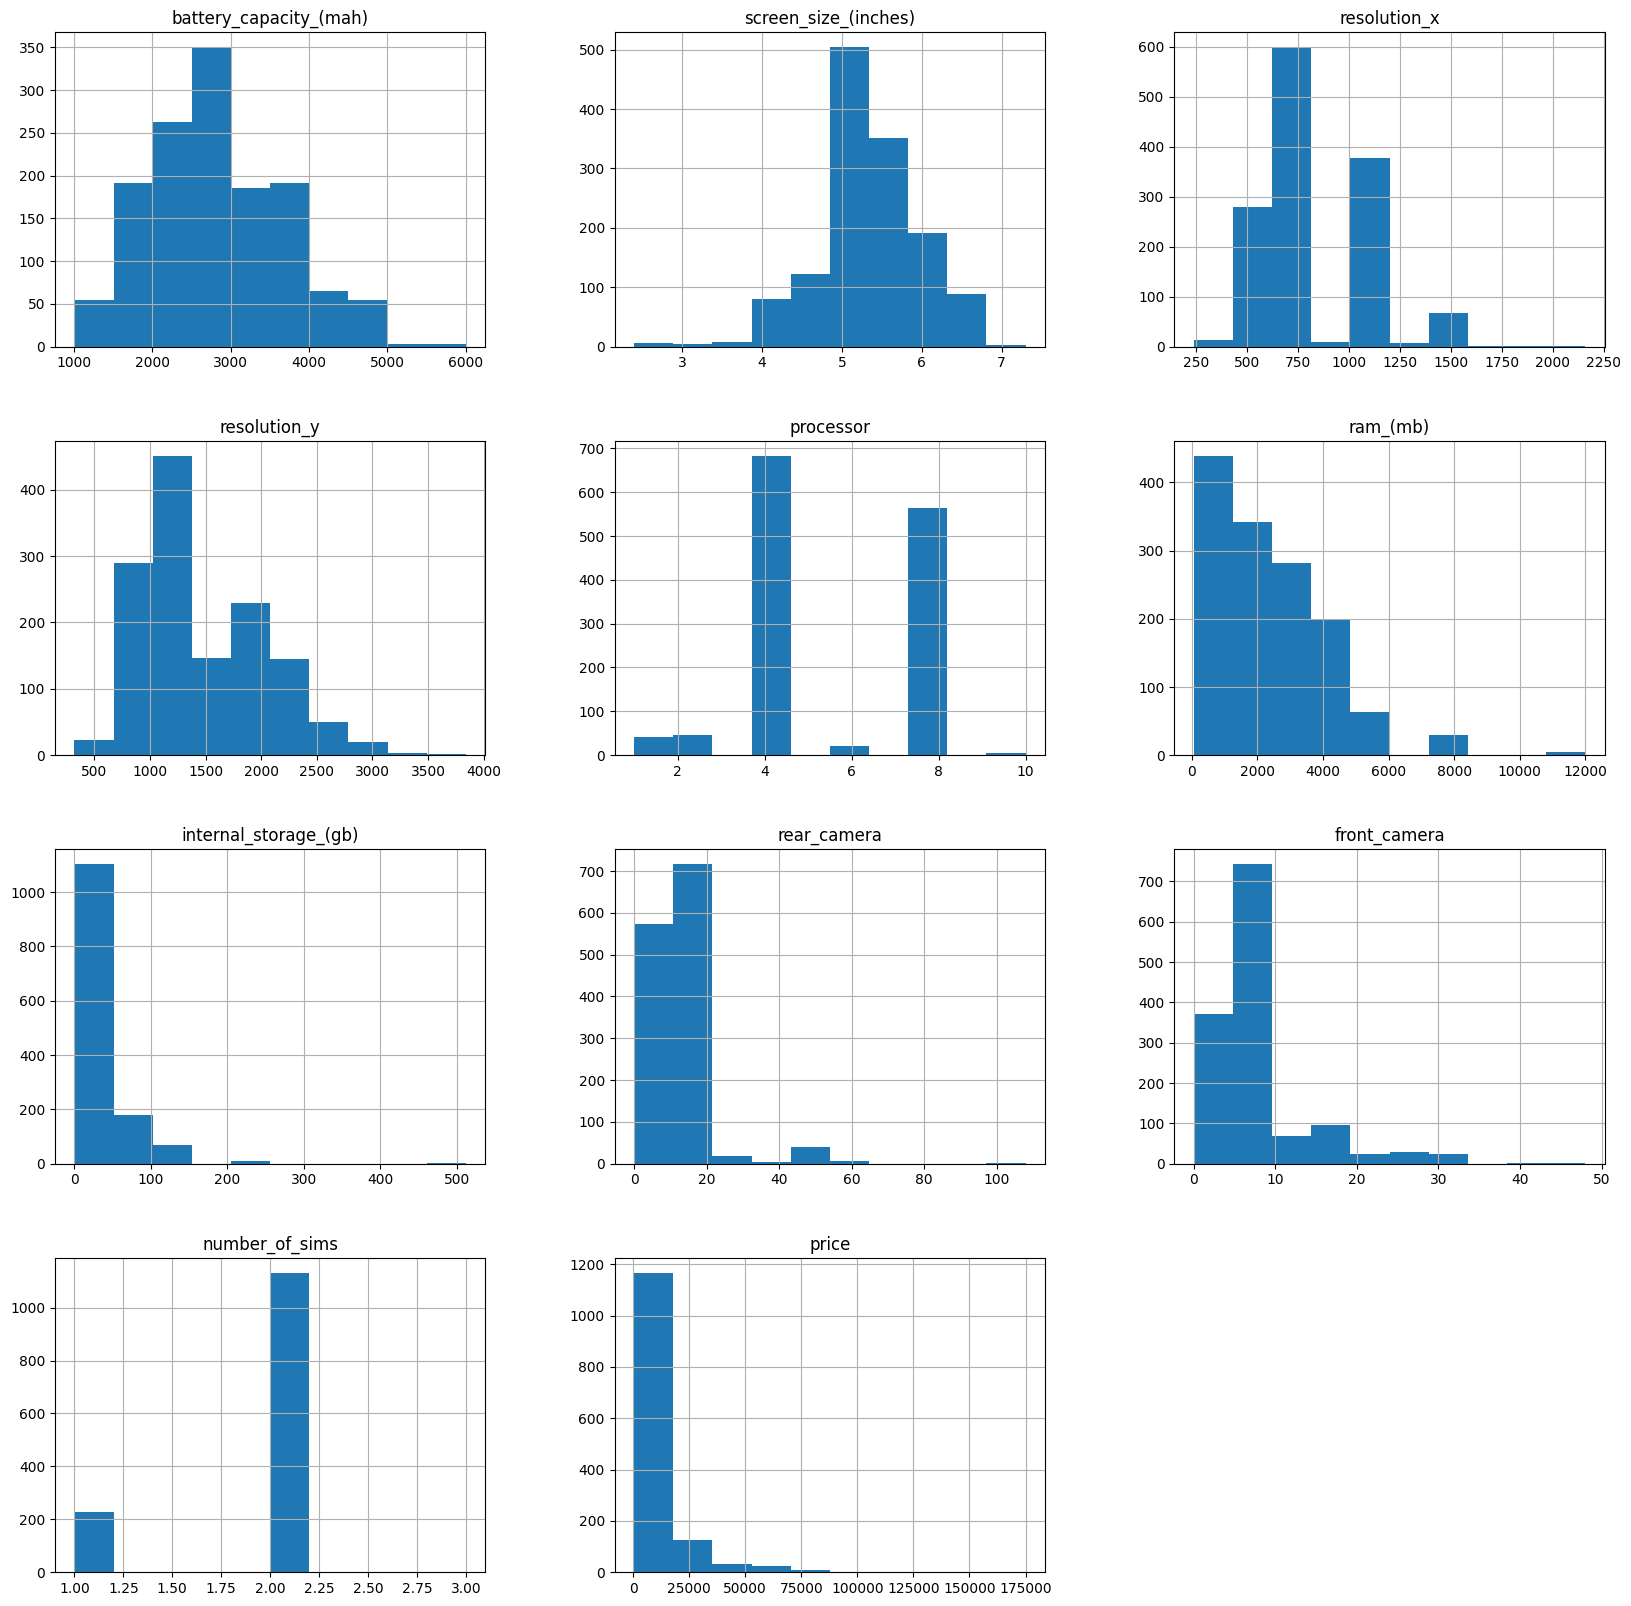

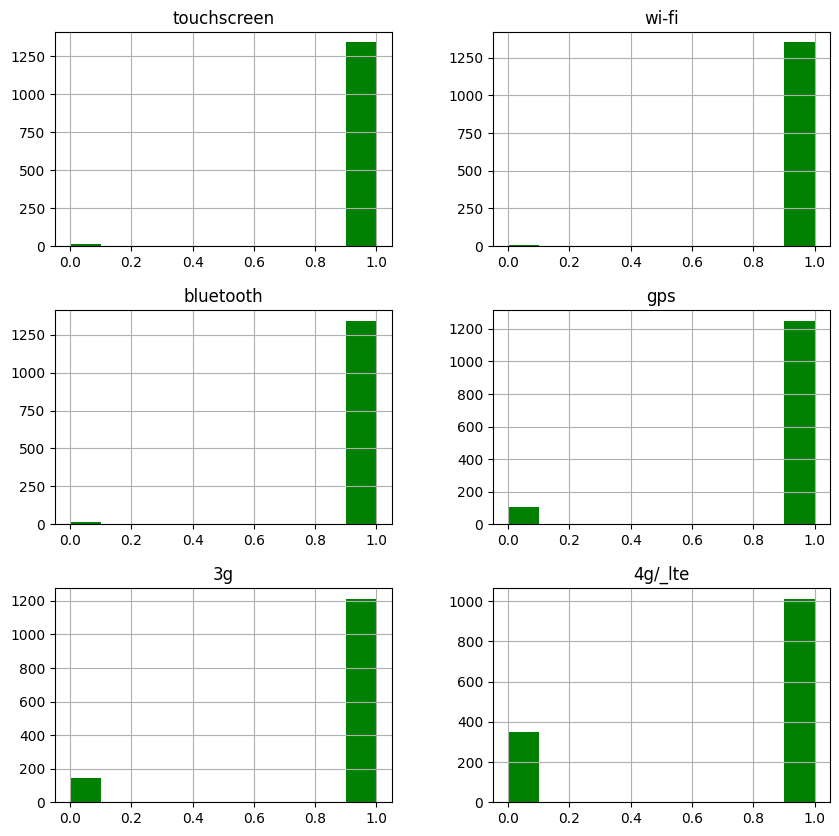

In [7]:
#gráficos
print(df[["battery_capacity_(mah)","screen_size_(inches)","resolution_x","resolution_y","processor","ram_(mb)","internal_storage_(gb)","rear_camera","front_camera","number_of_sims","price"]].hist(figsize=(20,20)))
#hago de color verde los booleanos
print(df[["touchscreen","wi-fi","bluetooth","gps","3g","4g/_lte"]].hist(figsize=(10,10),color="g"))

##Outliers:

In [8]:
print("Old Shape: ", df.shape)
#hago los "cuatriles del 10% para eliminar menos datos"
Q1 = df['price'].quantile(0.10)
Q3 = df['price'].quantile(0.90)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df["price"]>=upper)[0]
lower_array = np.where(df['price']<=lower)[0]

# Elimino outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

Old Shape:  (1359, 21)


In [9]:
print("New Shape: ", df.shape)

New Shape:  (1324, 21)


Se han eliminado 35 datos, un 2,57% del total.

###Dato extra:
Con datos extra estadísticos tomados de un estudio realizado por Omdia en el 2Q2022, dividiré las marcas entre "reconocidas mundialmente" y "pequeñas". Siendo las más famosas: Samsung, Apple, Xiaomi, Oppo, Vivo, Honor, Realme, Motorola, Tecno, Huawei.

In [10]:
marcas_conocidas=["Samsung", "Apple", "Xiaomi", "Oppo", "Vivo", "Honor", "Realme", "Motorola", "Tecno", "Huawei"]

conditions = [
    (df["brand"] == marcas_conocidas[0]),    (df["brand"] ==marcas_conocidas[1]),
    (df["brand"] ==marcas_conocidas[2]),    (df["brand"] ==marcas_conocidas[3]),
    (df["brand"] ==marcas_conocidas[4]),    (df["brand"] ==marcas_conocidas[5]),
    (df["brand"] ==marcas_conocidas[6]),    (df["brand"] ==marcas_conocidas[7]),
    (df["brand"] ==marcas_conocidas[8]),    (df["brand"] ==marcas_conocidas[9])
]
values=['famosa', 'famosa', 'famosa', 'famosa', 'famosa', 'famosa', 'famosa', 'famosa', 'famosa', 'famosa']

df['brand_type'] = np.select(conditions, values)

df["brand_type"]=df["brand_type"].replace("0","desconocida")

Agrego una variable según la el precio la cual las separa en "max", "min" y "resto", la cantidad de max y min queda en manos de quien opera el código.

In [11]:
#separo los celulares en  3 grupos según el precio
i=50 #cuantas filas de max y min?
df_sorted_max = df.sort_values(by="price",ascending=False).iloc[:i,:]
df_sorted_max['top'] = "max"
df_sorted_min = df.sort_values(by="price",ascending=True).iloc[:i,:]
df_sorted_min['top'] = "min"
df_max_min = pd.concat([df_sorted_max,df_sorted_min])

df_resto = df.sort_values(by="price",ascending=False).iloc[i:len(df.name)-i,:]
df_resto['top'] = "resto"
df_con_max_min_resto= pd.concat([df_max_min,df_resto])

#df_max_min.head(3)
#df_max_min.tail(3)



---
#Importación de API:


In [12]:
#import requests

#url = "https://cellphones.p.rapidapi.com/phones/getbrands"

#headers = {
#	"X-RapidAPI-Key": "0e8f9cee40msh9798eb62ba5abdcp187156jsn8c62ff9772ef",
#	"X-RapidAPI-Host": "cellphones.p.rapidapi.com"
#}

#response = requests.get(url, headers=headers)

#print(response.json())

In [13]:
#marcas_api=[]
#for i in range(1,len(response.json())):
#  marcas_api.append(response.json()[i]["name"])

In [14]:
#marcas_api


---

#Desafío: Data Storyelling


###1. ¿La marca de un teléfono móvil afecta su precio?

Hipótesis: Las marcas premium tienden a tener precios más altos en comparación con las marcas menos conocidas o de bajo presupuesto.

[Text(0.5, 0, 'Precios'),
 Text(0, 0.5, 'Tipo de marca'),
 Text(0.5, 1.0, 'Boxplot de Precio vs Tipo de marca')]

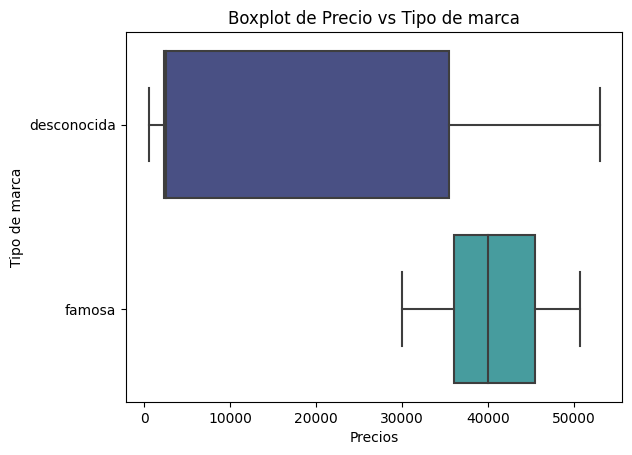

In [15]:
ax=sns.boxplot(data=df_max_min,x="price",y="brand_type",palette="mako")
ax.set(xlabel='Precios', ylabel='Tipo de marca', title='Boxplot de Precio vs Tipo de marca')

Se observa cómo las marcas desconocidas tienen mucha mayor varianza que las conocidas y cómo estás tienen una menor media.

###2. ¿Existe una correlación entre el tamaño de la pantalla y la capacidad de la batería?

Hipótesis: Los tamaños de pantalla más grandes se asocian con mayor espacio para la batería.


<ipython-input-16-8bf968f569ee>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.scatterplot(data=df_con_max_min_resto,x="screen_size_(inches)",y="battery_capacity_(mah)",alpha=0.8,palette="Set2")


[Text(0.5, 0, 'Tamaño de pantalla (pulgadas)'),
 Text(0, 0.5, 'Capacidad de la batería (mah)'),
 Text(0.5, 1.0, 'Tamaño vs Capacidad de Batería')]

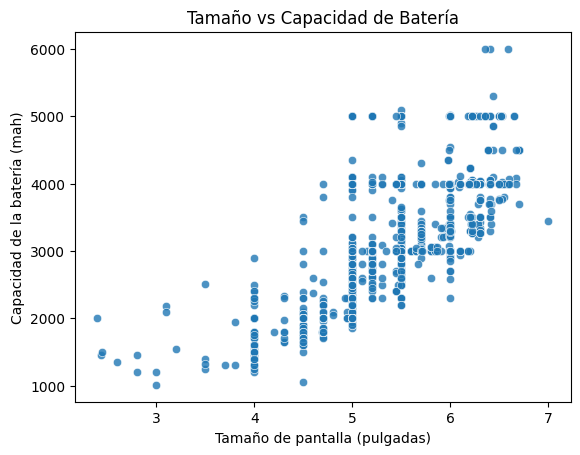

In [16]:
ax=sns.scatterplot(data=df_con_max_min_resto,x="screen_size_(inches)",y="battery_capacity_(mah)",alpha=0.8,palette="Set2")
ax.set(xlabel='Tamaño de pantalla (pulgadas)', ylabel='Capacidad de la batería (mah)', title='Tamaño vs Capacidad de Batería')

Efectivamente, existe una relación entre el tamaño y la capacidad de la batería, puede observarse una clara relación lineal donde a mayor tamaño, mayor capacidad.

###3. ¿Qué impacto tiene la resolución de la pantalla en el precio de un teléfono?

Hipótesis: Los teléfonos con pantallas de alta resolución es probable que tengan precios más altos, ya que ofrecen una mejor calidad visual.


Figure(1500x800)
Figure(1500x800)


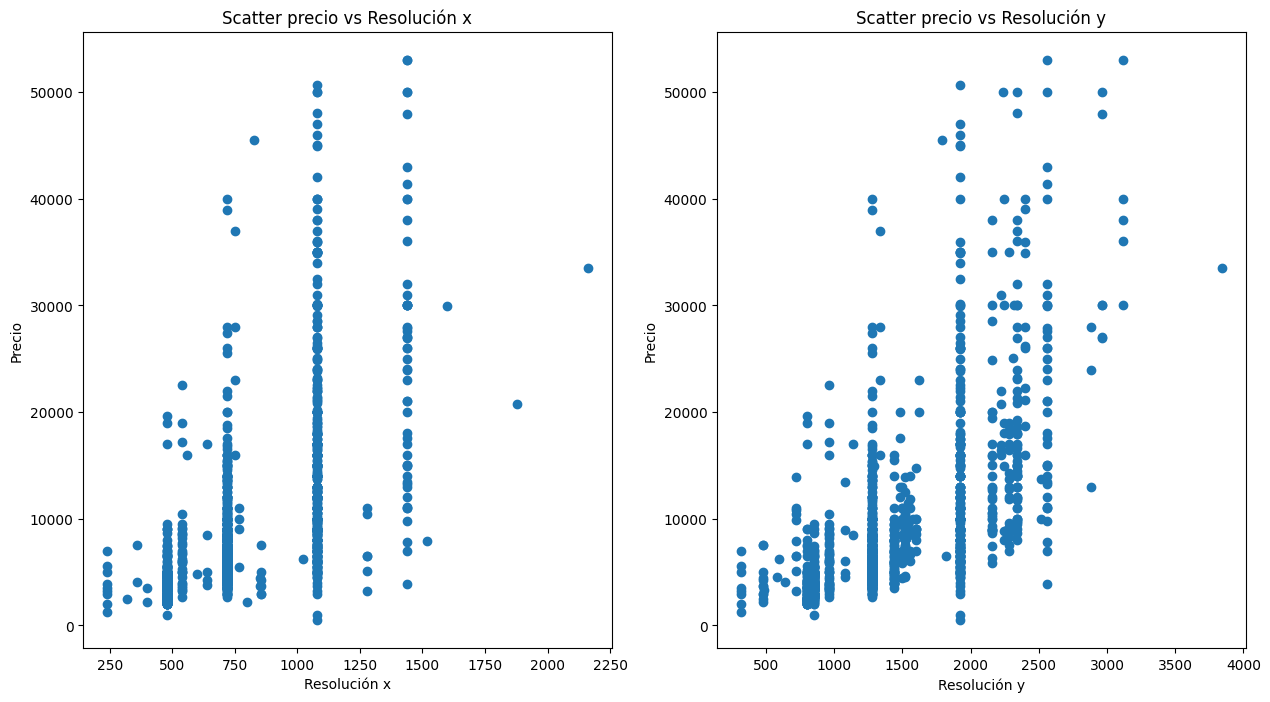

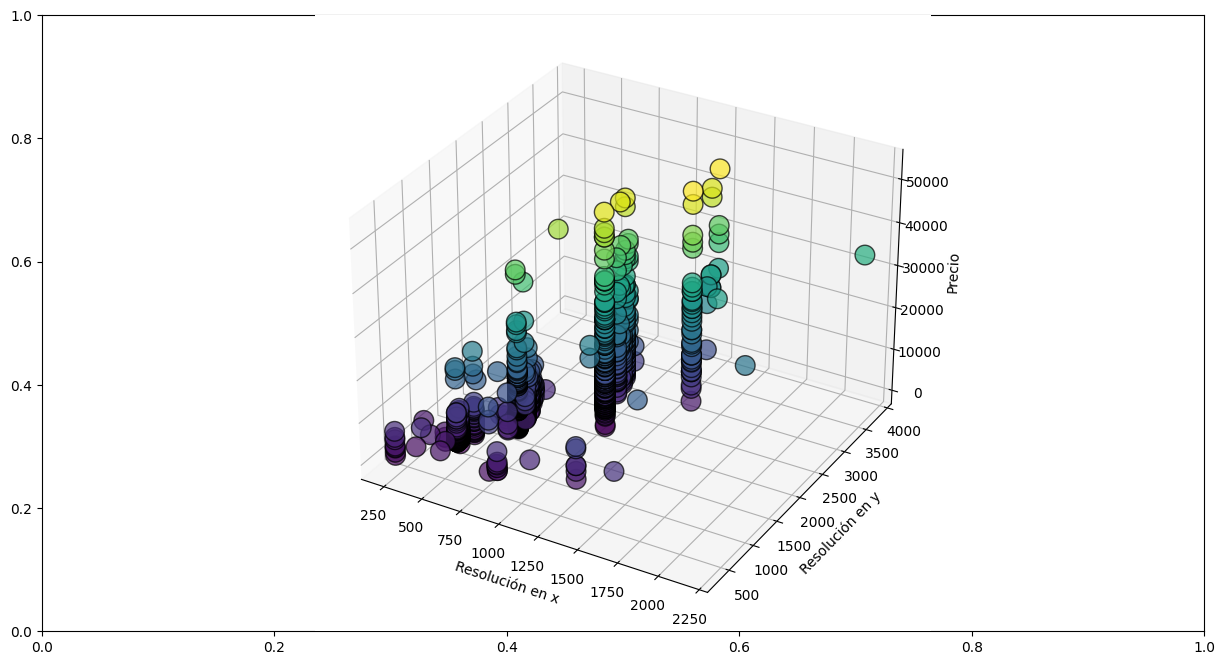

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,8))
ax[0].scatter(y=df.price,x=df.resolution_x)
ax[0].set_title('Scatter precio vs Resolución x')
ax[0].set_xlabel("Resolución x")
ax[0].set_ylabel("Precio")

ax[1].scatter(y=df.price,x=df.resolution_y)
ax[1].set_title('Scatter precio vs Resolución y')
ax[1].set_xlabel("Resolución y")
ax[1].set_ylabel("Precio")
print(fig)

x=df.resolution_x
y=df.resolution_y
z=df.price
fig2,ax2 = plt.subplots(ncols=1,nrows=1,figsize=(15,8))
ax2 = fig2.add_subplot(1,1,1, projection='3d')
ax2.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax2.set_xlabel("Resolución en x")
ax2.set_ylabel("Resolución en y")
ax2.set_zlabel("Precio")
#ax2.invert_yaxis()
#ax2.invert_xaxis()
print(fig2)

No existe una clara relación entre estos factores. A mi parecer, esto se debe a que hay mucha concentración en una misma región de x e y, como se denota en el gráfico en 3D, hay columnas con un mismo valor x e y y diferente altura (precio).
Esto es porque las resoluciones tienen normalmente valores muy parecidos (HD+ 720×1280 píxeles, Full HD+ 1080×1920 píxeles y WQHD+ 1440 x 2560 píxeles).

###4. ¿Influye la capacidad de almacenamiento interno en la definición de ambas cámaras (delantera y trasera)?

Hipótesis: Los teléfonos móviles con mayores capacidades de almacenamiento interno deben a tener más capacidad de guardar fotografías más pesadas, ya que ofrecen más espacio para aplicaciones, medios y archivos.

Figure(1500x800)
Figure(1500x800)


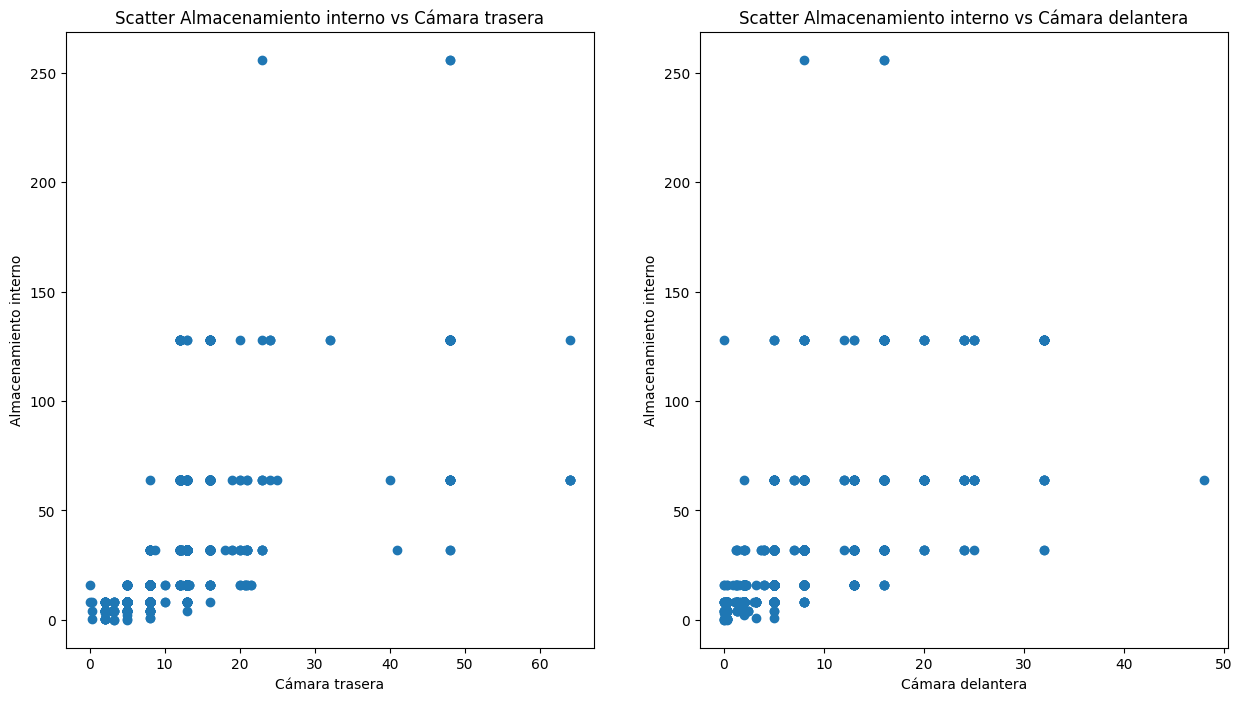

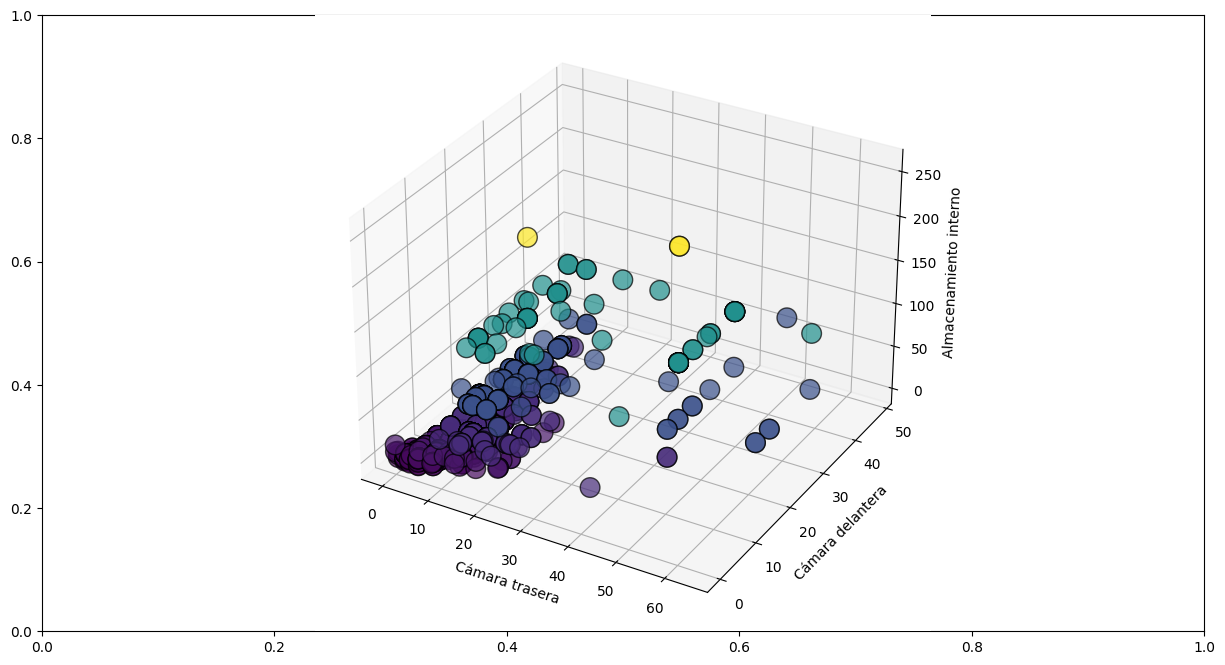

In [18]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,8))
ax[0].scatter(y=df["internal_storage_(gb)"],x=df.rear_camera)
ax[0].set_title('Scatter Almacenamiento interno vs Cámara trasera')
ax[0].set_xlabel("Cámara trasera")
ax[0].set_ylabel("Almacenamiento interno")

ax[1].scatter(y=df["internal_storage_(gb)"],x=df.front_camera)
ax[1].set_title('Scatter Almacenamiento interno vs Cámara delantera')
ax[1].set_xlabel("Cámara delantera")
ax[1].set_ylabel("Almacenamiento interno")
print(fig)

x=df.rear_camera
y=df.front_camera
z=df["internal_storage_(gb)"]
fig2,ax2 = plt.subplots(ncols=1,nrows=1,figsize=(15,8))
ax2 = fig2.add_subplot(1,1,1, projection='3d')
ax2.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax2.set_xlabel("Cámara trasera")
ax2.set_ylabel("Cámara delantera")
ax2.set_zlabel("Almacenamiento interno")
#ax2.invert_yaxis()
#ax2.invert_xaxis()
print(fig2)

Si bien en este caso hay mayor dependencia entre las variables que en el caso anterior, no es lo suficientemente contundente como para considerarla una relación fuerte.


---

#Desafío: Modelos Analíticos

In [19]:
model1 = 'price~brand'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          8.27e-113
Time:                        22:18:42   Log-Likelihood:                -13449.
No. Observations:                1324   AIC:                         2.705e+04
Df Residuals:                    1250   BIC:                         2.743e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5999.0000 

###Conclusión 1:
Es correcto que la marca afecta al precio, sin embargo, ciertas marcas tienen mucha varianza en sus precios, por lo que no es un parámetro dispensable a la hora de predecir un precio pero tampoco es 100% representativo.
Además, analizando los p-values, se puede notar que las marcas más conocidas tienen un menor valor, indicando que aportan, en cierta forma, mayor información.
También podemos asegurar que las marcas más famosas tienen, en general, mayores precios.

In [20]:
#quito "()" del nombre de la columna
df.rename(columns = {'screen_size_(inches)':'screen_size'}, inplace = True)
df.rename(columns = {'battery_capacity_(mah)':'battery_capacity'}, inplace = True)

model1 = 'screen_size~battery_capacity'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

#coloco "()" en el nombre de la columna
df.rename(columns = {'screen_size':'screen_size_(inches)'}, inplace = True)
df.rename(columns = {'battery_capacity':'battery_capacity_(mah)'}, inplace = True)

                            OLS Regression Results                            
Dep. Variable:            screen_size   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1644.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          3.30e-234
Time:                        22:18:42   Log-Likelihood:                -796.88
No. Observations:                1324   AIC:                             1598.
Df Residuals:                    1322   BIC:                             1608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6191      0.043  

### Conclusión 2:
Efectivamente, existe una relación entre el tamaño y la capacidad de la batería, sin embargo mínima, el modelo es malo. Se necesitarían más parámetros (ya que el p-value es menor a 0,001, pero el r-squared es 0,558).

In [21]:
model1 = 'price~resolution_x+resolution_y'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     443.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.73e-148
Time:                        22:18:42   Log-Likelihood:                -13495.
No. Observations:                1324   AIC:                         2.700e+04
Df Residuals:                    1321   BIC:                         2.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5378.3682    573.894     -9.372   

### Conclusión 3:
No existe una clara relación entre estos factores. A mi parecer, esto se debe a que hay mucha concentración en una misma región de x e y, como se denota en el gráfico en 3D, hay columnas con un mismo valor x e y y diferente altura (precio).

In [22]:
#quito "()" del nombre de la columna
df.rename(columns = {'internal_storage_(gb)':'internal_storage'}, inplace = True)

model1 = 'internal_storage~rear_camera+front_camera'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

#coloco "()" en el nombre de la columna
df.rename(columns = {'internal_storage':'internal_storage_(gb)'}, inplace = True)

                            OLS Regression Results                            
Dep. Variable:       internal_storage   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     805.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.95e-229
Time:                        22:18:42   Log-Likelihood:                -5868.3
No. Observations:                1324   AIC:                         1.174e+04
Df Residuals:                    1321   BIC:                         1.176e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.7553      0.978     -2.817   

###Conclusión 4:
Si bien en este caso hay una mayor dependencia entre las variables que en el caso anterior, no es lo suficientemente contundente como para considerarlo un buen modelo.


---



##Intento de modelo completo

In [23]:
df.rename(columns = {'internal_storage_(gb)':'internal_storage'}, inplace = True)
df.rename(columns = {'screen_size_(inches)':'screen_size'}, inplace = True)
df.rename(columns = {'battery_capacity_(mah)':'battery_capacity'}, inplace = True)
df.rename(columns = {'ram_(mb)':'ram'}, inplace = True)


model1 = 'price~rear_camera+front_camera+screen_size+screen_size+internal_storage+brand+processor+resolution_x+resolution_y+number_of_sims+ram'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

df.rename(columns = {'internal_storage':'internal_storage_(gb)'}, inplace = True)
df.rename(columns = {'screen_size':'screen_size_(inches)'}, inplace = True)
df.rename(columns = {'screen_size':'battery_capacity_(mah)'}, inplace = True)
df.rename(columns = {'ram':'ram_(mb)'}, inplace = True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     29.68
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          4.90e-236
Time:                        22:18:42   Log-Likelihood:                -13117.
No. Observations:                1324   AIC:                         2.640e+04
Df Residuals:                    1241   BIC:                         2.683e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1299.0343 

El R-squared no es lo suficientemente elevado como para considerarlo un buen modelo, sin embargo no es tampoco malo. Estaría faltando alguna variable que identifique si el celular es un modelo de alta, baja o media gama dentro de la marca. Se sigue notando que los p-values de las marcas más conocidas tienen un menor p-value, indicando que aportan mayor información.

---
## Desafío:

Comienzo seleccionando variables a analizar, mediante un Forward Selection. Para predecir el tipo de marca utilizaré un árbol de desición ya que intentaré predecir una variable categórica ("famosa" vs "no famosa") y el tamaño de mi árbol lo determinaré iterando entre 1 y 14 ramas.

Paso mi variable objetivo a binaria y realizo un One-Hot-Encoding para facilitar el manejo de los datos.

No analizaré la columna "Marca" ya que sería hacer trampa.

Separo mi data set en grupos para training y testing (70% y 30% respectivamente)



In [24]:
!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [25]:
max_j=0
f1_j=0
lista_variables=[]
for j in range(1,17):
  sfs = SFS(DecisionTreeClassifier(),
          k_features=j,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
  df_con_max_min_resto.brand_type=df_con_max_min_resto.brand_type.replace("desconocida",0)
  df_con_max_min_resto.brand_type=df_con_max_min_resto.brand_type.replace("famosa",1)

  encoder = LabelEncoder()
  df_con_max_min_resto["operating_system"] = encoder.fit_transform(df_con_max_min_resto["operating_system"])
  x = df_con_max_min_resto.drop(["brand_type","name","brand","model","top"], 1)
  y = df_con_max_min_resto["brand_type"]
  y=y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  sfs = sfs.fit(x_train, y_train)
  variables=sfs.k_feature_names_
  lista_variables.append(variables)

  x_train_sfs = sfs.transform(x_train)
  x_test_sfs = sfs.transform(x_test)

  f1_i=0
  max_i=0
  for i in range(1,14):
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=i)
    tree.fit(x_train_sfs, y_train)
    y_pred = tree.predict(x_test_sfs)
    f1 = f1_score(y_test, y_pred, average='macro')
    #acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
    if f1>f1_i:
      max_i=i
      f1_i=f1
  if f1_i>f1_j:
    max_j=j
    f1_j=f1_i

<ipython-input-25-58d3a7b0c7b8>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_con_max_min_resto.drop(["brand_type","name","brand","model","top"], 1)
<ipython-input-25-58d3a7b0c7b8>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_con_max_min_resto.drop(["brand_type","name","brand","model","top"], 1)
<ipython-input-25-58d3a7b0c7b8>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_con_max_min_resto.drop(["brand_type","name","brand","model","top"], 1)
<ipython-input-25-58d3a7b0c7b8>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_con_max_min_resto.drop(["brand_type","name","brand","model","top"], 1)
<ipython

In [26]:
print("Mejor resultado: ", max_j, " variables tenidas en cuenta")
print("Mejor resultado: ", max_i, " Ramas")
print('F1 Score: %.2f %%' % (f1_i * 100))
print("Variables tenidas en cuenta", lista_variables[max_j-1])

Mejor resultado:  8  variables tenidas en cuenta
Mejor resultado:  10  Ramas
F1 Score: 74.93 %
Variables tenidas en cuenta ('battery_capacity_(mah)', 'screen_size_(inches)', 'touchscreen', 'resolution_x', 'resolution_y', 'processor', 'ram_(mb)', 'price')
